In [32]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing import image
from zipfile import ZipFile 

In [34]:
# importing libraries for Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
#Import dataset
test_dir="C:/Personal/Portfolio/cat-dog-classfication/dogs-cats-images/dataset/test_set"
train_dir="C:/Personal/Portfolio/cat-dog-classfication/dogs-cats-images/dataset/training_set"

train_dir_cats = train_dir + '/cats'
train_dir_dogs = train_dir + '/dogs'
test_dir_cats = test_dir + '/cats'
test_dir_dogs = test_dir + '/dogs'

In [36]:
#get numbers of images
print('number of cats training images - ',len(os.listdir(train_dir_cats)))
print('number of dogs training images - ',len(os.listdir(train_dir_dogs)))
print('number of cats testing images - ',len(os.listdir(test_dir_cats)))
print('number of dogs testing images - ',len(os.listdir(test_dir_dogs)))

number of cats training images -  4000
number of dogs training images -  4000
number of cats testing images -  1000
number of dogs testing images -  1000


In [38]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

batch_size=64

training_set = train_datagen.flow_from_directory(train_dir,
target_size = (100, 100),
batch_size = batch_size,
color_mode='rgb',
class_mode = 'binary',
shuffle=True)

test_set = test_datagen.flow_from_directory(test_dir,
target_size = (100, 100),
batch_size = batch_size,
color_mode='rgb',
class_mode = 'binary')

Using TensorFlow backend.


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [39]:
# preparing the layers in the Convolutional Deep Neural Network
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = training_data.image_shape))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.3))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.2))
model.add(Conv2D(filters = 126, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.15))
model.add(Flatten())
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(rate = 0.15))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate = 0.1))
model.add(Dense(units = len(set(training_data.classes)), activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 126)      

In [25]:
print(8000/32)

250.0


In [30]:
len(training_data)

250

In [41]:
#fit the model
#You can set steps per epoch equal to num_samples // batch_size, which is a typical choice.
fitted_model=model.fit_generator(training_data,steps_per_epoch=np.ceil(training_data.samples/batch_size),
                                 epochs=25,validation_data=testing_data,validation_steps=np.ceil(testing_data.samples/batch_size))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 125.0 steps, validate for 32.0 steps
Epoch 1/25
125/125 [==============================] - 63s 507ms/step - loss: 0.6945 - accuracy: 0.5017 - val_loss: 0.6922 - val_accuracy: 0.5781
Epoch 2/25
125/125 [==============================] - 59s 474ms/step - loss: 0.6893 - accuracy: 0.5410 - val_loss: 0.6820 - val_accuracy: 0.5645
Epoch 3/25
125/125 [==============================] - 58s 467ms/step - loss: 0.6775 - accuracy: 0.5705 - val_loss: 0.6553 - val_accuracy: 0.6279
Epoch 4/25
125/125 [==============================] - 59s 472ms/step - loss: 0.6559 - accuracy: 0.6137 - val_loss: 0.6602 - val_accuracy: 0.6318
Epoch 5/25
125/125 [==============================] - 62s 494ms/step - loss: 0.6377 - accuracy: 0.6378 - val_loss: 0.6146 - val_accuracy: 0.6504
Epoch 6/25
125/125 [==============================] - 64s 509ms/step - loss: 0.6132 - accuracy: 0.6637 - val_loss: 0.6069 - val_accuracy: 0.6582
Epoch 7/25
125/125 [=============

In [42]:
print(fitted_model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


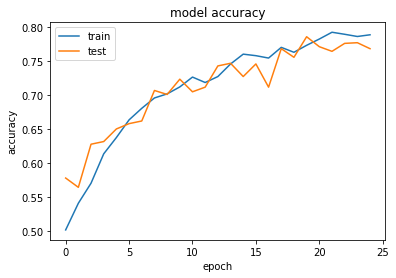

In [44]:
plt.plot(fitted_model.history['accuracy'])
plt.plot(fitted_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

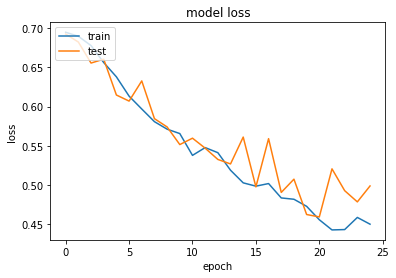

In [45]:
# summarize history for loss
plt.plot(fitted_model.history['loss'])
plt.plot(fitted_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

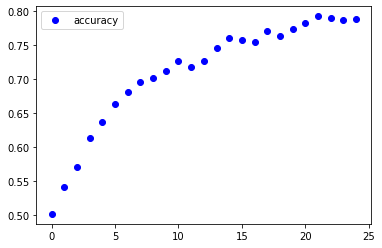

In [46]:
# plotting accuracy and validation accuracy
accuracy = fitted_model.history['accuracy']
plt.plot(range(len(accuracy)), accuracy, 'bo', label = 'accuracy')
plt.legend()

In [47]:
# testing the model
def testing_image(image_directory):
    test_image = image.load_img(image_directory, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(x = test_image)
    print(result)
    if result[0][0]  == 1:
        prediction = 'Dog'
    else:
        prediction = 'Cat'
    return prediction

In [48]:
print(testing_image(test_dir + '/cats/cat.4003.jpg'))

[[0. 1.]]
Cat
